# Multiple linear regression analysis 

### Cholesterol level dataset

The objective is to know how age, height and weight influence the cholesterol value of a man. 

200 men are selected and their age, height, weight and cholesterol are recorded. 

**Task: Analyze data and create a regression model. Predict the cholesterol value for a person with an age of 40, a height of 170 and a weight of 65.**

In [1]:
# import the data set
chol_data <- read.table(file="/mnt/c/Users/Nnamdi/Desktop/Bioinformatics/Univariate_data_modelling/data/UDM/chol_R.txt", header  = T)

In [2]:
head(chol_data)

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,20,176,77,195,nonsmo,b,alive
2,53,167,56,250,sigare,o,dead
3,44,170,80,304,sigare,a,dead
4,37,173,89,178,nonsmo,o,alive
5,26,170,71,206,sigare,o,alive
6,41,165,62,284,sigare,o,alive


In [3]:
# create a subset dataset of the necessary variables
chol_df = data.frame(chol_data[,c(1,2,3,4)])

Descriptive staistics

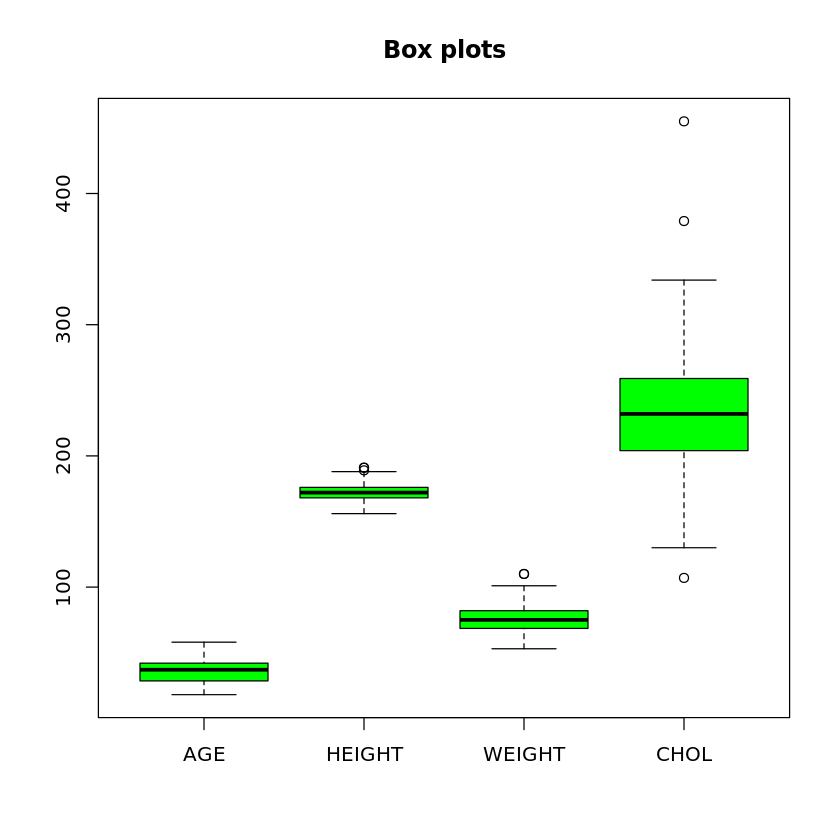

In [4]:
boxplot(chol_df, col = "green", main = "Box plots")

### Correlation analysis

In [5]:
# test for normality of variables with Shapiro-wilk test
apply(chol_df, 2, FUN = shapiro.test)

$AGE

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96863, p-value = 0.0001917


$HEIGHT

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.99027, p-value = 0.1957


$WEIGHT

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.98194, p-value = 0.01127


$CHOL

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96918, p-value = 0.0002241



Null hypothesis of shapiro test : data has normal distribution 

Alternative hypothesis of shapiro test : data does not have normal distribution

Since some of the p-values are below 0.05, we will reject the null hypothesis in favour of the alternative hypothesis 

Hence, Spearman correlation test will be used


In [6]:
# Use spearman correlation test because the data is not normally distributed
pairs(chol_data2)
chol_cor <- cor(chol_df, method = "spearman")
chol_cor

ERROR: Error in pairs(chol_data2): object 'chol_data2' not found


In [7]:
cor.test(chol_df$CHOL, chol_df$AGE, method = "spearman",  exact=F)


	Spearman's rank correlation rho

data:  chol_df$CHOL and chol_df$AGE
S = 725770, p-value = 1.204e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4556556 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value < 0.05, there is significant positive correlation between age and cholesterol level

In [8]:
cor.test(chol_df$CHOL, chol_df$HEIGHT, method = "spearman", exact=F)


	Spearman's rank correlation rho

data:  chol_df$CHOL and chol_df$HEIGHT
S = 1674700, p-value = 0.000253
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2560269 


null hypothesis: there is no correlation

alternative hypothesis: there is correlation (either positive of negative)

Since the p-value < 0.05, there is significant negative correlation between cholesterol level and height

In [9]:
cor.test(chol_df$CHOL, chol_df$WEIGHT, method = "spearman",  exact=F)


	Spearman's rank correlation rho

data:  chol_df$CHOL and chol_df$WEIGHT
S = 1361200, p-value = 0.7683
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02095938 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value > 0.05, there is no significant correlation between weight and cholesterol

## Linear regression 

In [10]:
chol.lm = lm(CHOL~.,data = chol_df)
summary(chol.lm)


Call:
lm(formula = CHOL ~ ., data = chol_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-122.652  -25.575   -3.224   26.743  196.244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 380.3834    81.4156   4.672 5.53e-06 ***
AGE           1.8537     0.3105   5.970 1.10e-08 ***
HEIGHT       -1.3161     0.5050  -2.606  0.00985 ** 
WEIGHT        0.1824     0.3154   0.578  0.56371    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.41 on 196 degrees of freedom
Multiple R-squared:  0.2366,	Adjusted R-squared:  0.2249 
F-statistic: 20.25 on 3 and 196 DF,  p-value: 1.786e-11


### Model diagnostics

Test for linearity and constant variance (homoscedasticity)

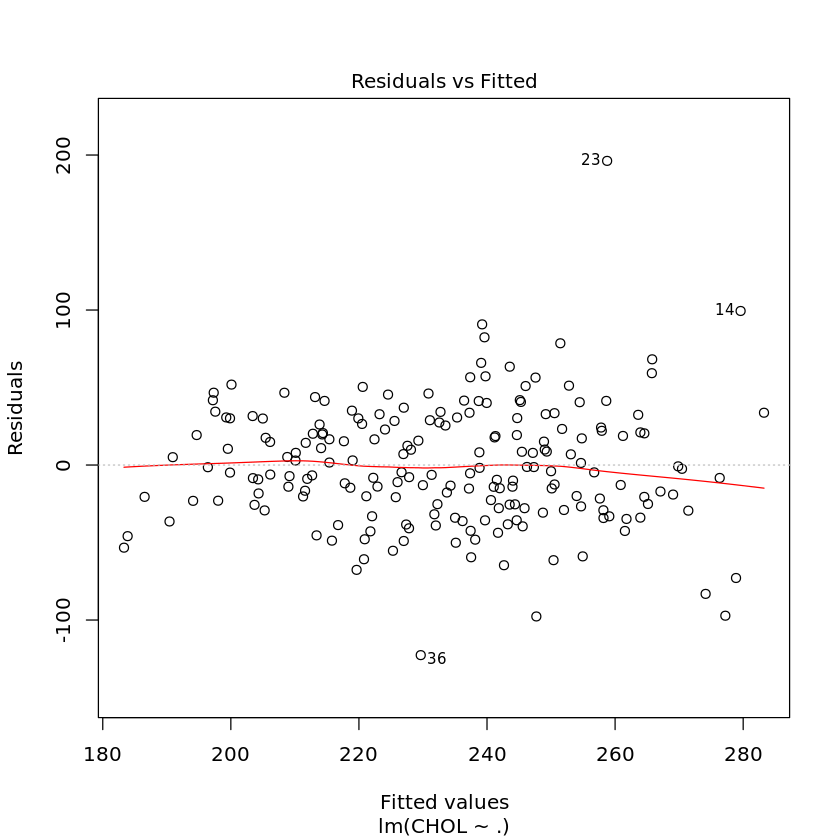

In [11]:
 plot(chol.lm, which = 1)

The model obeys the assumption of linearity and homoscedasticity since the data points are evenly distributed around zero ( homoscedasticity ) and the red line is paralled to the zero line (linearity)

Test for normal distribution

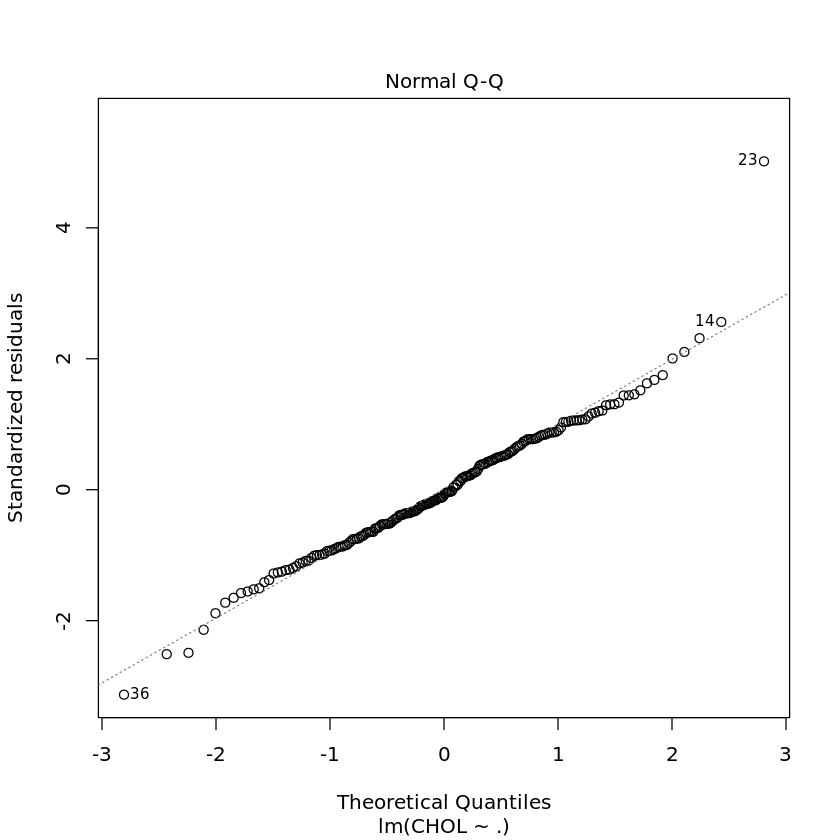

In [12]:
 plot(chol.lm, which = 2)

The normal qq-plot shows that the data points fulfilled the assumption of normality since the observations are distributed along the normal qq-plot line

Test for influential outliers

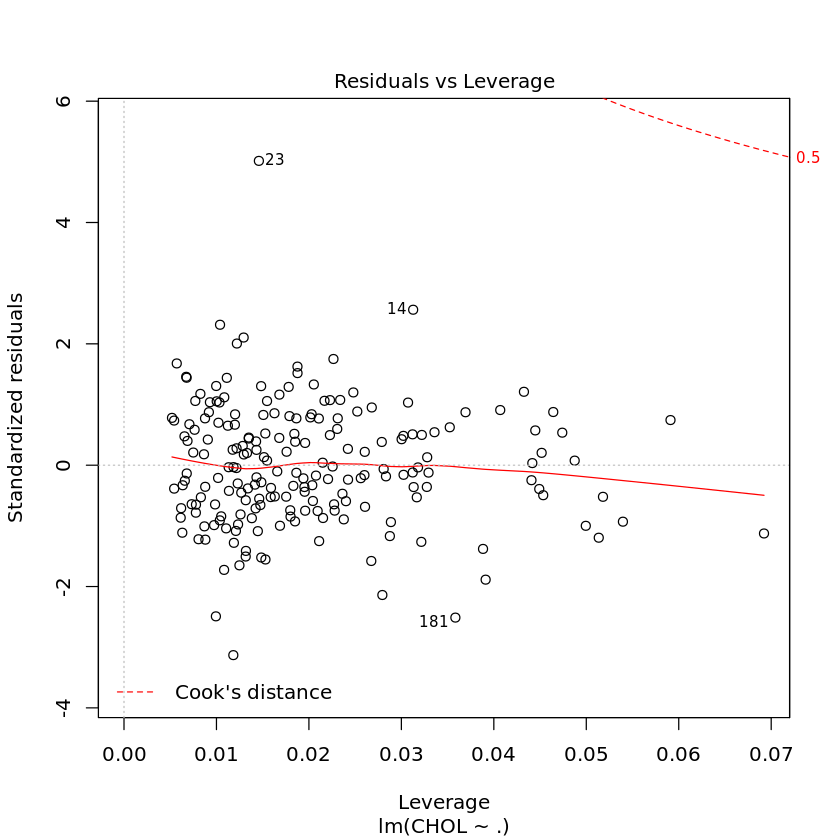

In [13]:
plot(chol.lm, which = 5)

The plot indicates that none of the outliers are influential

## Interpretation of the estimated regression model

In [14]:
chol.lm = lm(CHOL~.,data = chol_df)
summary(chol.lm)


Call:
lm(formula = CHOL ~ ., data = chol_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-122.652  -25.575   -3.224   26.743  196.244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 380.3834    81.4156   4.672 5.53e-06 ***
AGE           1.8537     0.3105   5.970 1.10e-08 ***
HEIGHT       -1.3161     0.5050  -2.606  0.00985 ** 
WEIGHT        0.1824     0.3154   0.578  0.56371    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.41 on 196 degrees of freedom
Multiple R-squared:  0.2366,	Adjusted R-squared:  0.2249 
F-statistic: 20.25 on 3 and 196 DF,  p-value: 1.786e-11


The estimated regression model is given as :

 cholesterol = 380.3834 + 1.8537(age) - 1.3161 (height) + e

where e represents unexplained error.

This model implies that when comparing individuals with the same height, there is 1.8537 increase in  cholesterol level for every 1 year increase in age. 
Equally, when comparing individuals with the same age, there is 1.3161 decrease in cholesterol level with 1 unit increase in height.

The R-squared value indicates that age and height can explain 22% percent of the variability in cholesterol level. 

## Prediction of cholesterol values

To perform a simple test of the predictive accuracy of the estimated regression model, I will test the model on already known values in the data to check if the prediction will be similar to the actual value of the cholesterol level

In [15]:
head(chol_df)

,AGE,HEIGHT,WEIGHT,CHOL
,<int>,<int>,<int>,<int>
1,20,176,77,195
2,53,167,56,250
3,44,170,80,304
4,37,173,89,178
5,26,170,71,206
6,41,165,62,284


In [16]:
row1 <- data.frame(AGE=20,HEIGHT = 176, WEIGHT = 77)
pred_CI <- predict(chol.lm, row1, interval = "confidence")
pred_CI

,fit,lwr,upr
1,199.8694,189.257,210.4819


In [17]:
row6 <- data.frame(AGE=41,HEIGHT = 165, WEIGHT = 62)
pred_CI <- predict(chol.lm, row6, interval = "confidence")
pred_CI

,fit,lwr,upr
1,250.5372,240.622,260.4524


Predict the cholesterol level for an individual with the following details : age = 40, height = 170 and weight = 65

In [18]:
unknown <- data.frame(AGE=40, HEIGHT = 170, WEIGHT = 65)
pred <- predict(chol.lm, unknown, interval = "confidence")
pred

,fit,lwr,upr
1,242.6503,233.9653,251.3352


The predicted cholesterol level is 242.65 with a 95% confidence interval between 233.97 and 251.34